# Problem Statement

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In [172]:
## Import all the libraries you need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [173]:
## Reading the datasets and its rows and columns

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print('No. of Rows and Columns of Training dataset: ',train.shape)
print('No. of Rows and Columns of Testing dataset: ',test.shape)

No. of Rows and Columns of Training dataset:  (381109, 12)
No. of Rows and Columns of Testing dataset:  (127037, 11)


In [174]:
## Read the data of training set

train.head().append(train.tail())

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


## Basic EDA

In [175]:
## View information about the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There is no missing value in the data
By looking at the info of the dataset we can get a rough idea on the numeric and the string columns

In [176]:
## see how many columns are there

col = train.columns.tolist()
col

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [177]:
## do descriptive analysis

col.remove('id')
train[col].describe(percentiles=(.25,.5,.75,.95,.99))

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


1. By looking at the summary of the data we can infer the mean,standard deviation, min and max of the.
2. We will be able to get a idea on the outliers here by the percentiles ( In the Annual_Premium the 99th percentile is 72963 and the max is 540165 this represents the outliers in this column)

Percentage of target class
0    87.743664
1    12.256336
Name: Response, dtype: float64


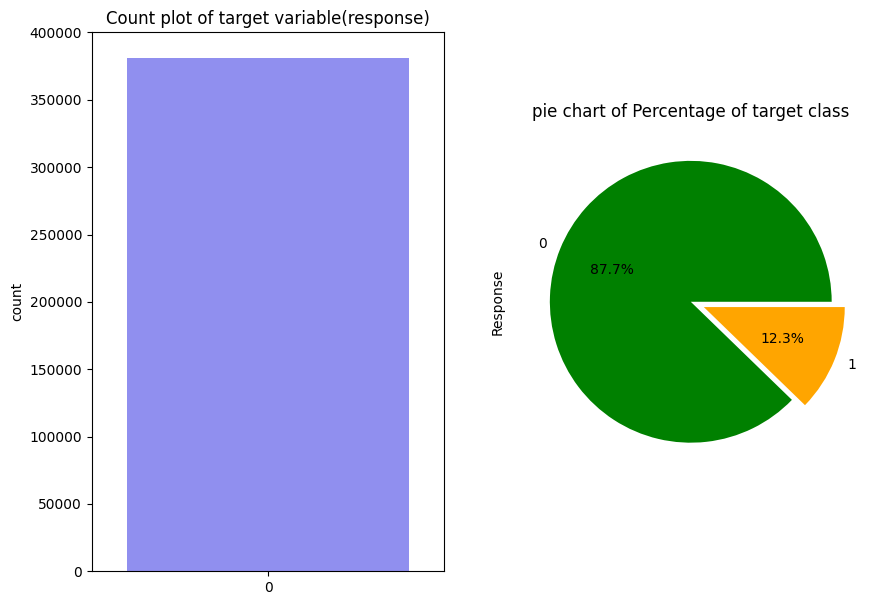

In [178]:
## Data Visualisation for the Target Variable(Response)

plt.subplot(1,2,1)
sns.countplot(train['Response'],palette='cool')
plt.title('Count plot of target variable(response)')

plt.subplot(1,2,2)
count=train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")

print('Percentage of target class')
print(train['Response'].value_counts()/len(train)*100)

1. By the plot we can say that this is the problem of imbalance binary classification problem
2. The indivisuals not interested is 87 % as compared to the othe one.

## Gender Variable

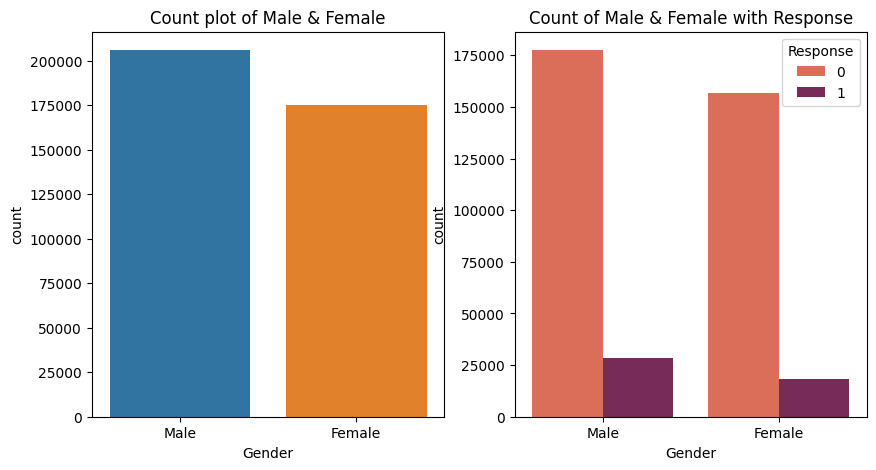

In [179]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = train.Gender)
plt.title('Count plot of Male & Female')

plt.subplot(1,2,2)
sns.countplot(x = train['Gender'],hue=train['Response'],palette='rocket_r')
plt.title('Count of Male & Female with Response')
plt.show()

1. The gender variable in the dataset is almost equally distributed.
2. Male category is slightly greater than that of female and chances of buying the insurance is also little high.

## Age Variable

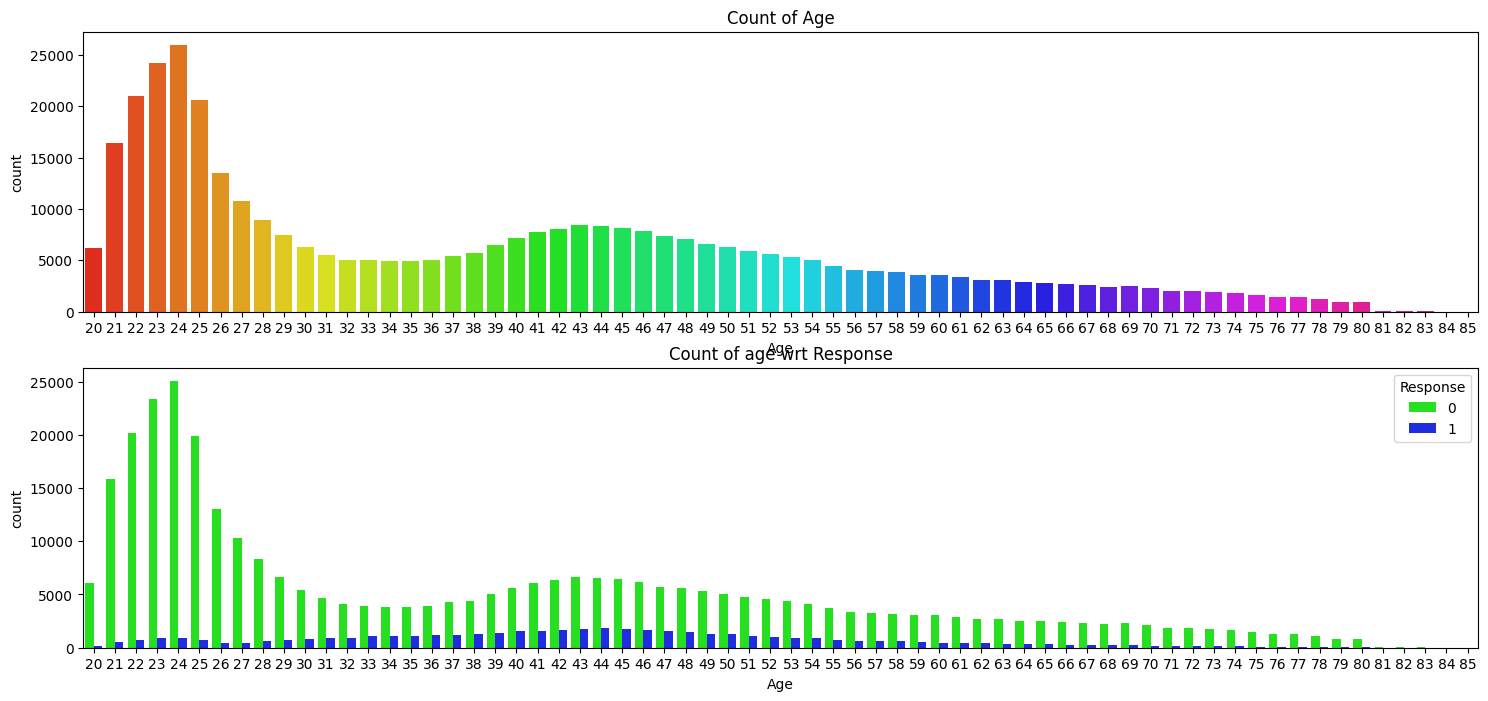

In [180]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
sns.countplot(x = train['Age'],palette='hsv')
plt.title('Count of Age')

plt.subplot(2,1,2)
sns.countplot(x = train['Age'],hue=train["Response"],palette='hsv')
plt.title('Count of age wrt Response')
plt.show()

<AxesSubplot: >

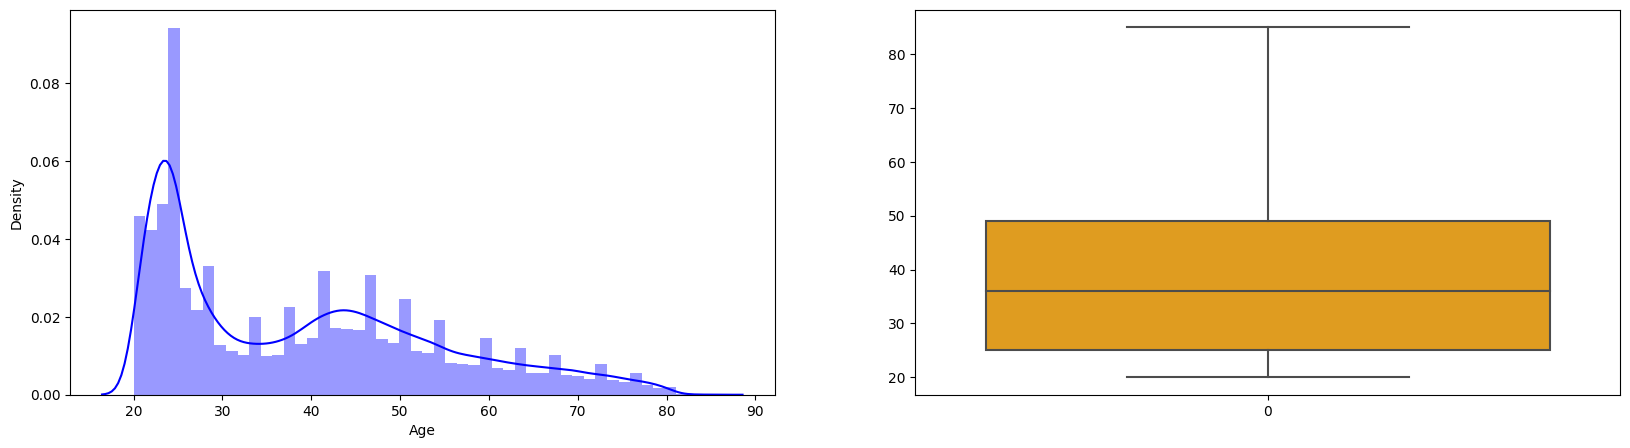

In [181]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(train['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(train['Age'],ax = axx[1],color='Orange')

1. Count of the indivisuals with age 24 are greater in the dataset.
2. Variable Age looks like right skewed.
3. From the boxplot we observe that here is not serious outliers in the data.

## Driving License 

Percentage of customers having driving license 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64
Plot of Driving License and response


<AxesSubplot: xlabel='Driving_License', ylabel='count'>

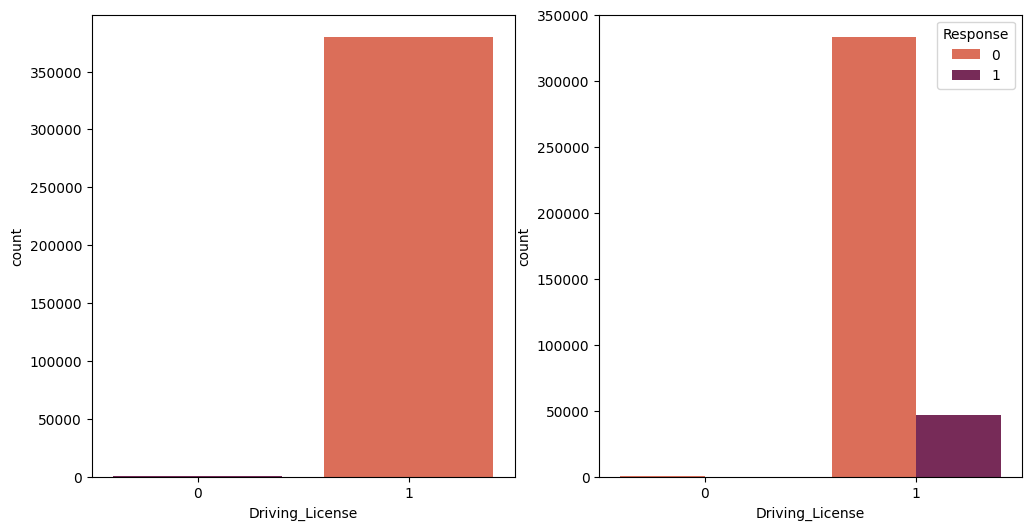

In [182]:
print('Percentage of customers having driving license ')
print(train['Driving_License'].value_counts()/len(train)*100)

f,ax = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
axx=ax.flatten()
print('Plot of Driving License and response')
sns.countplot(x = train['Driving_License'],ax=axx[0],palette='rocket')
sns.countplot(x = train['Driving_License'],hue='Response',data=train, ax=axx[1],palette='rocket_r')


1. Customers who have the DL are 99.7%
2. Customers who are interested in Vehicle Insurance almost all have driving license

## Region Code

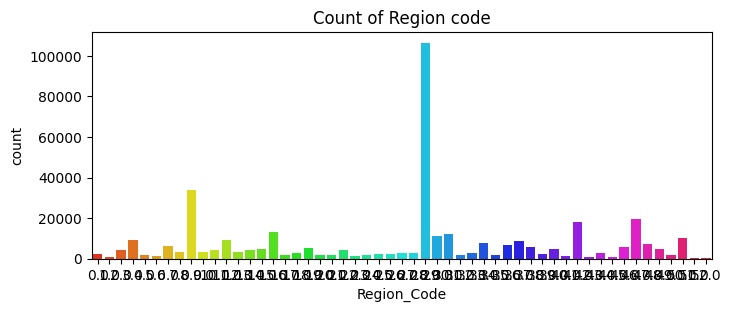

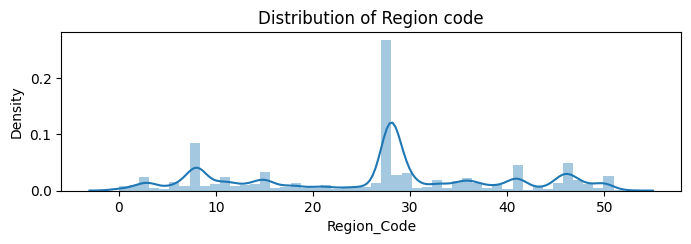

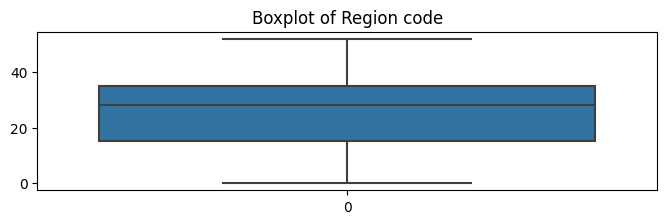

In [183]:
plt.figure(figsize = (8,10))
plt.subplot(3,1,1)
sns.countplot(x = train['Region_Code'], palette = 'hsv')
plt.title('Count of Region code')

plt.figure(figsize = (8,7))
plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')

plt.figure(figsize = (8,7))
plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')

plt.show()

1. The indivisuals with region code 28 the highest as compared to the other ones.
2. From the box plot it looks like there is no outliers in the data.
3. Further we can analyze which region has highest intrested customers.

## Previously Insured

Percentage of Previously_Insured feature
 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


<AxesSubplot: xlabel='Previously_Insured', ylabel='count'>

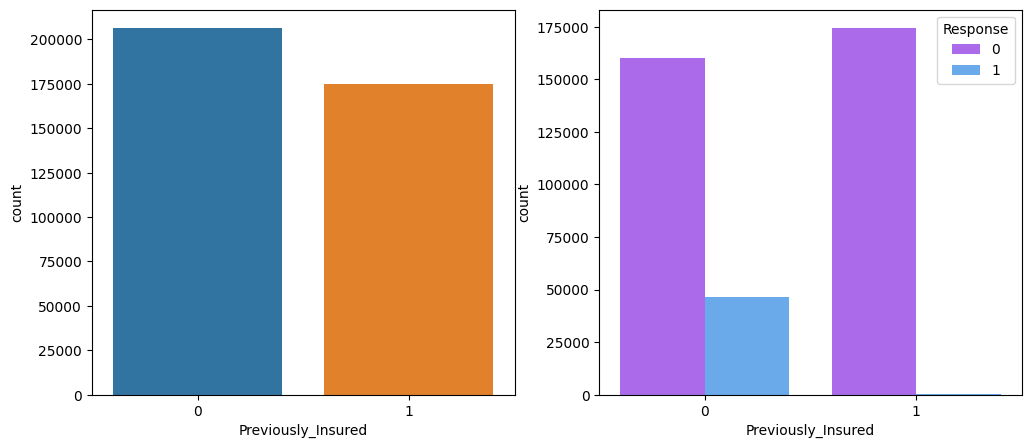

In [184]:
print("Percentage of Previously_Insured feature\n ")
print(train['Previously_Insured'].value_counts()/len(train)*100)

f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(x = train['Previously_Insured'],ax = axx[0])
sns.countplot(x = train['Previously_Insured'], hue = 'Response',ax =axx[1],data = train,palette="cool_r")

1. The variable perviosly insured almost has equal count.
2. Customer who are not perviosly insured are likely to be interested.

## Vehicle Age

Percentage of vechicle age feature
 
1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64


<AxesSubplot: title={'center': 'Plot of vechicle age vs response'}, xlabel='Vehicle_Age', ylabel='count'>

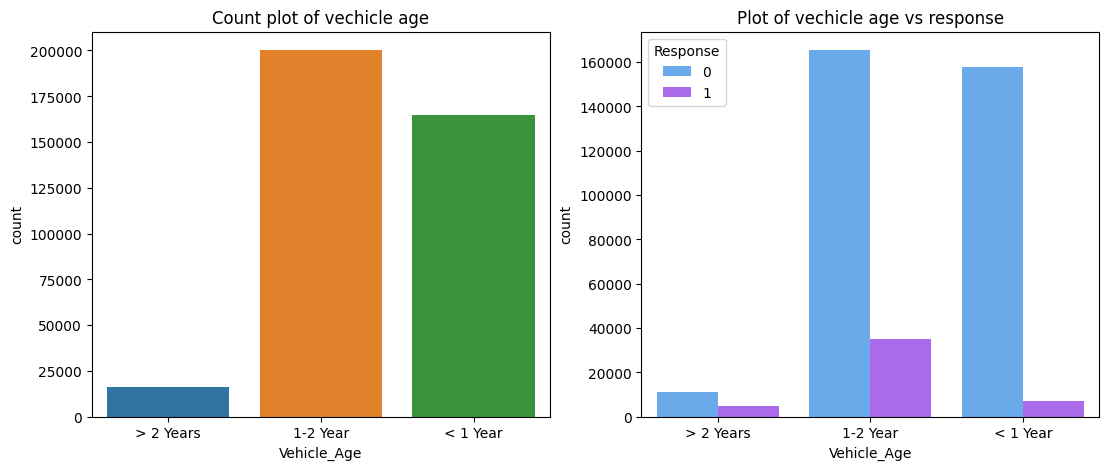

In [185]:
print("Percentage of vechicle age feature\n ")
print(train['Vehicle_Age'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
sns.countplot(x = train['Vehicle_Age'])
plt.title("Count plot of vechicle age")

plt.subplot(1,2,2)
plt.title("Plot of vechicle age vs response")
sns.countplot(x = train['Vehicle_Age'], hue = 'Response',data = train,palette="cool")

1. There is very less number of customers with vechicle age less than 2 years.
2. Customers with vechicle age 1-2 years are more likely to interested as compared to the other two.

## Vehicle Damage

Percentage of vechicle damage feature
 
Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64


<AxesSubplot: title={'center': 'Plot of vechicle damage vs response'}, xlabel='Vehicle_Damage', ylabel='count'>

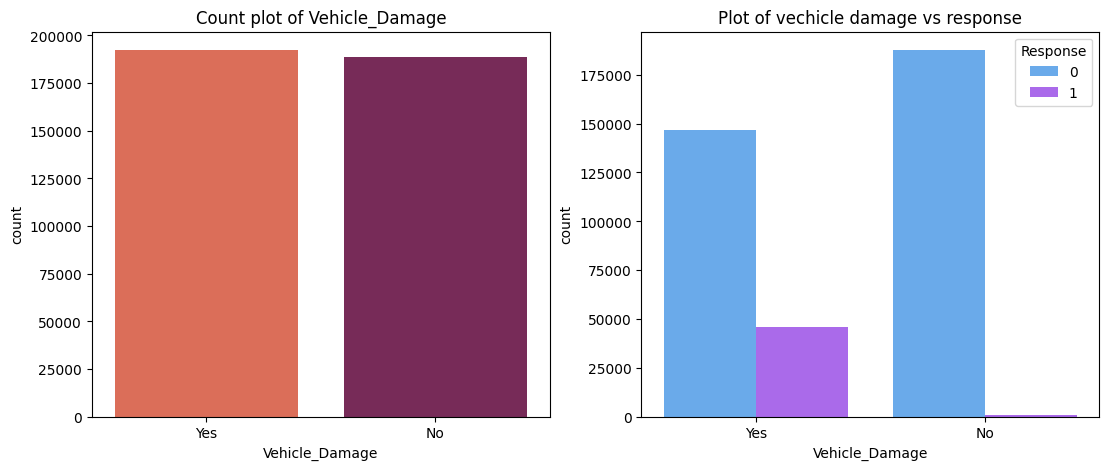

In [186]:
print("Percentage of vechicle damage feature\n ")
print(train['Vehicle_Damage'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
sns.countplot(x = train['Vehicle_Damage'],palette="rocket_r")
plt.title("Count plot of Vehicle_Damage")

plt.subplot(1,2,2)
plt.title("Plot of vechicle damage vs response")
sns.countplot(x = train['Vehicle_Damage'], hue = 'Response',data = train,palette="cool")

1. Customers with vechicle damage(Yes and NO) are equally distributed with (50.48 % , 49.51 %).
2. Customers with vechicle damage are more interested in Vehicle Insurance.

## Annual Premium

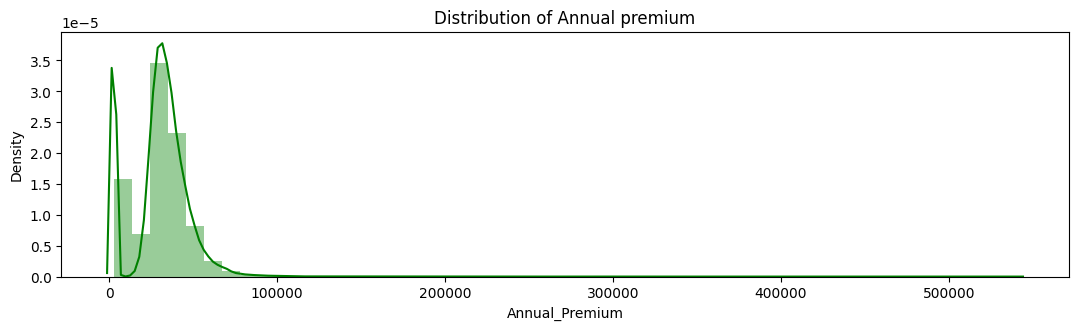

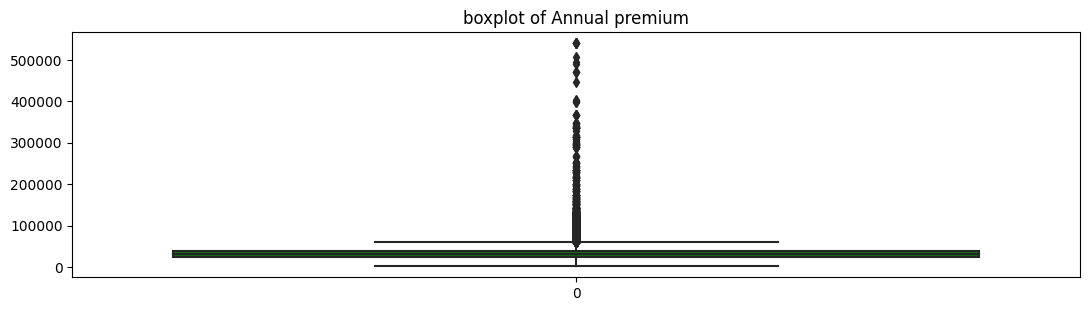

In [187]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(train['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

1. From the distribution plot we can infer that the annual premimum variable is right skewed.
2. From the boxplot we can observe lot of outliers in the variable.

## Policy Sales Channel

<AxesSubplot: title={'center': 'Boxplot of Policy_Sales_Channel'}>

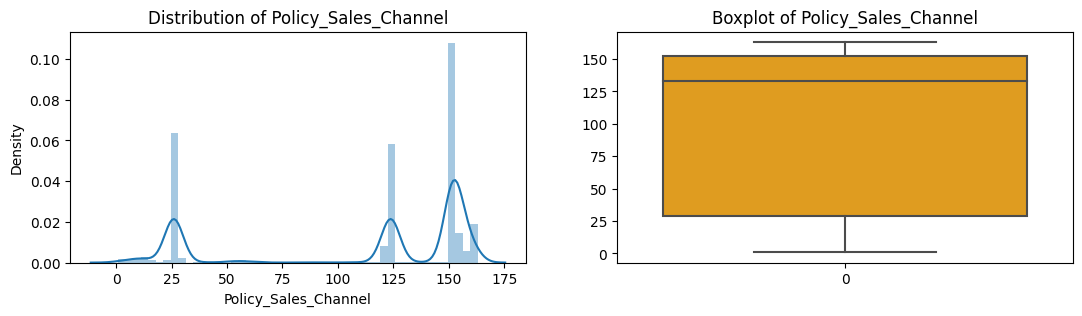

In [188]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(train['Policy_Sales_Channel'])

plt.subplot(1,3,2)
plt.title("Boxplot of Policy_Sales_Channel")
sns.boxplot(train['Policy_Sales_Channel'],color='Orange')

## Vintage

<AxesSubplot: >

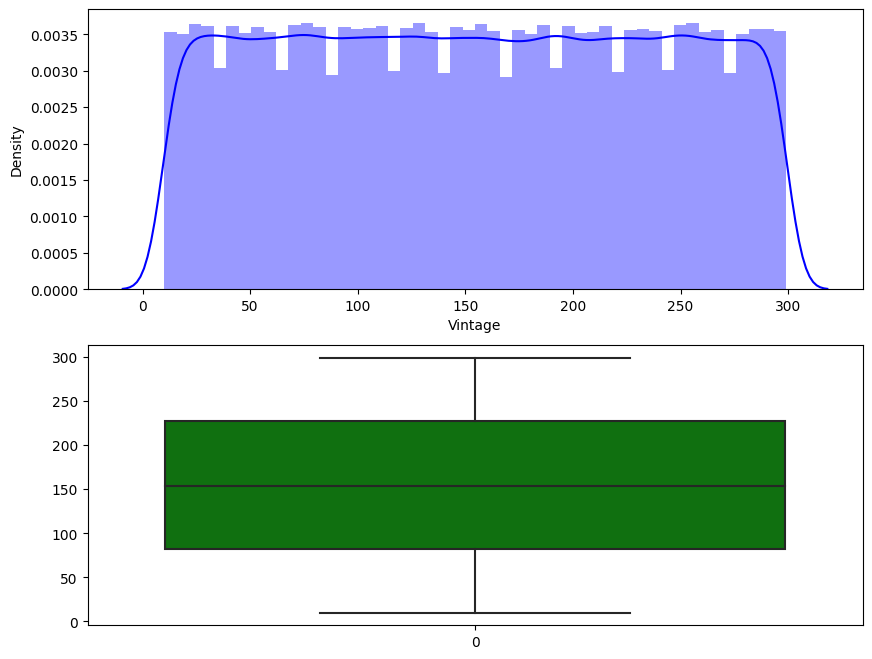

In [189]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
axx = ax.flatten()
sns.distplot(train['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(train['Vintage'],ax=axx[1],color='green')

## Correlation

<AxesSubplot: title={'center': 'Correlation plot'}>

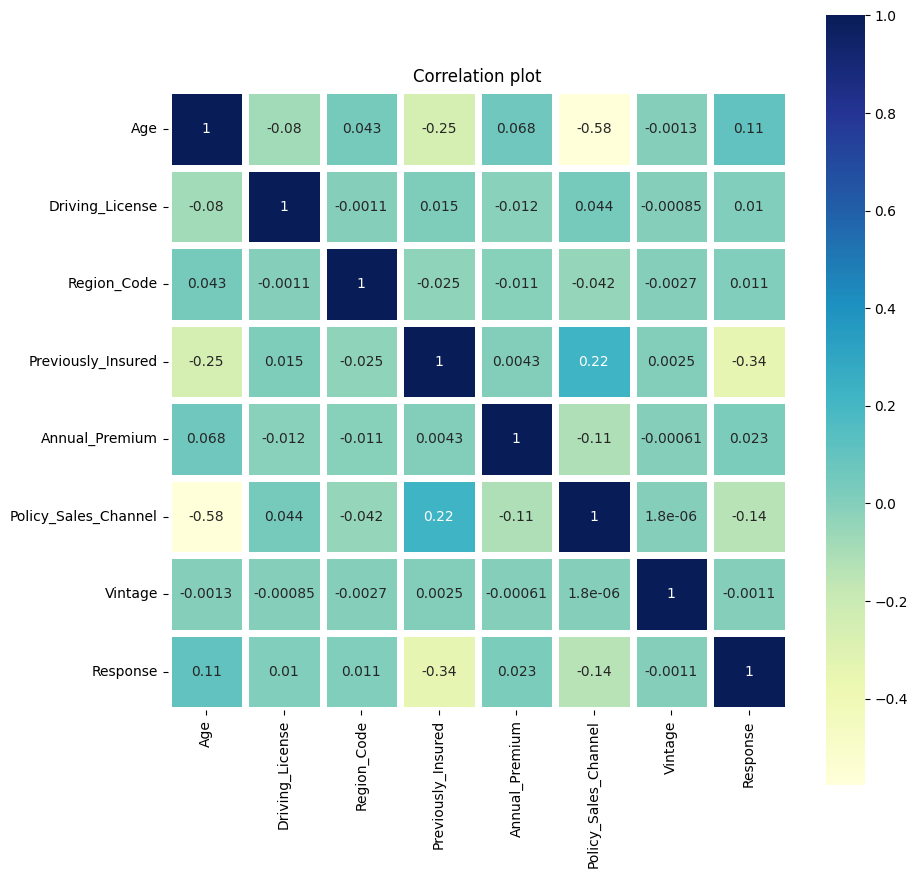

In [190]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train[col].corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

1. From the correlation plot we observe that policy sales channel has slightly greater correlation with Age variable, this may be the indication of multicollinearity.
2. We can futher use VIF to check this

## Categorical Attributes

In [191]:
train.select_dtypes(include='object').describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


## Label Encoding

In [192]:
def label_encode(data):
    
    categorical_column = data.select_dtypes(include='object').columns
    le = LabelEncoder()
    
    for feature in categorical_column:
        data[feature] = le.fit_transform(data[feature].astype(str))
    
    return data

In [193]:
# Label encoding on train and test data.
label_encode(train)
label_encode(test)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,1,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,0,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,1,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,0,0,62875.0,26.0,265


## VIF (Variance Inflation Factor)
To calculate the multicolinearity of data we use VIF.

In [194]:
def vif_value(data):

    # the independent variables set
    X = data.iloc[:, 1:-1]

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
        for i in range(len(X.columns))]

    return vif_data

In [195]:
vif_data = vif_value(train)
vif_data

,feature,VIF
0,Gender,2.231620
1,Age,12.432596
2,Driving_License,45.548706
3,Region_Code,4.956361
4,Previously_Insured,5.690104
5,Vehicle_Age,2.514786
6,Vehicle_Damage,6.280743
7,Annual_Premium,4.210364
8,Policy_Sales_Channel,7.923982
9,Vintage,4.374067


 Here we can see Driving_License has higher VIF value and it is highly unbalanced so we can drop that column.


In [196]:
# dropping 'Driving_License' column.
train.drop('Driving_License', axis=1, inplace=True)
test.drop('Driving_License', axis=1, inplace=True)

## Train test split

In [197]:
def data_split(data):
    
    X = data.iloc[:,1:-1]  #features
    y = data.iloc[:,-1]  #label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [198]:
X_train, X_test, y_train, y_test = data_split(train)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 224148, 1: 31195})
Testing target statistics: Counter({0: 110251, 1: 15515})


### Data Scaling

In [199]:
# data scaling.
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Model Building

In this stage we will create our model using ML libraries.

We have also used Cross Validation to select across diffrent models.

In [200]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.601


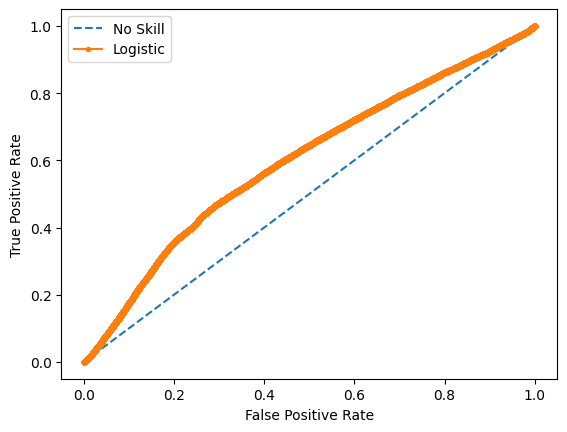

In [201]:
# model building without balancing the data.
lr=LogisticRegression(solver="liblinear", random_state=0)
lr.fit(X_train,y_train)

## Before Balancing
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

As we can see we are getting ROC Score 60% without balancing the dataset.

In [202]:
# Value count of label
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

The data is imbalanced so we need to do oversampling or undersampling.

Different techniques for sampling the data are.

1. Oversample the smallest class.
    
    a. Random Over Sampler.
    
    b. SMOTE Analysis.
    
    
2. Oversample the bigger class.
    
    a. Random under sampler
    
    b. Near miss

In [203]:
# Smote Analysis
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
X_train_balanced,X_test_balanced,y_train_balanced,y_test_balanced=train_test_split(X_balanced,y_balanced,test_size=0.3,
                                                                                   random_state=5)

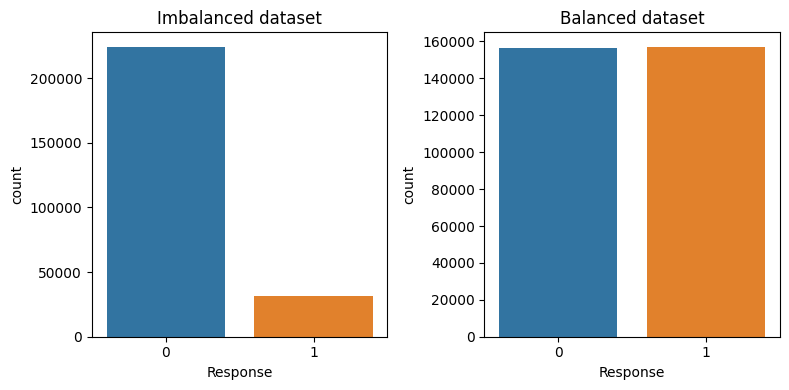

In [204]:
# Plotting balannced and unbalanced data.
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x = y_train)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(x = y_train_balanced)
plt.title('Balanced dataset')

plt.savefig('Model_build_1.png')
plt.tight_layout()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.854


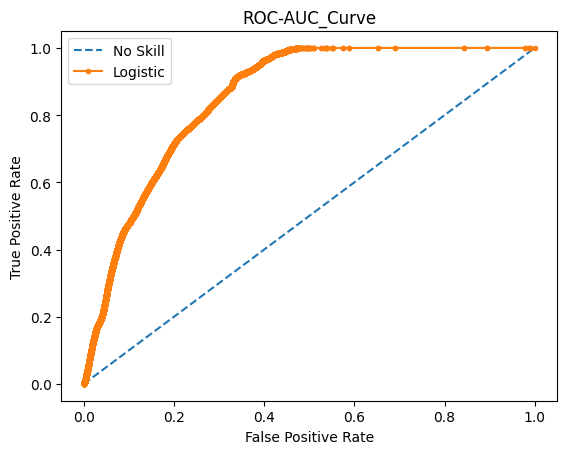

In [205]:
# Logistc Regression.
lr_balanced=LogisticRegression(solver="liblinear", random_state=0)
lr_balanced.fit(X_train_balanced,y_train_balanced)

# After Balancing
ns_probs = [0 for _ in range(len(y_test_balanced))]
lr_probs = lr_balanced.predict_proba(X_test_balanced)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc = roc_auc_score(y_test_balanced, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_balanced, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.title('ROC-AUC_Curve')
plt.show()

We can clearly see the ROC Score has gone up from 60% to 85% after balancing rhe data.

## Testing the data on various models

In [206]:
models=[]
models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))
models.append(('knn',KNeighborsClassifier()))

In [207]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True,random_state=5)
    cv_score=cross_val_score(model,X_balanced,y_balanced,cv=kf,scoring='roc_auc',verbose=1)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression: 0.852957 (0.000856)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTree: 0.878723 (0.000582)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest: 0.966121 (0.000561)
knn: 0.894066 (0.001115)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.8s finished


We can see Random Forest has performed best.

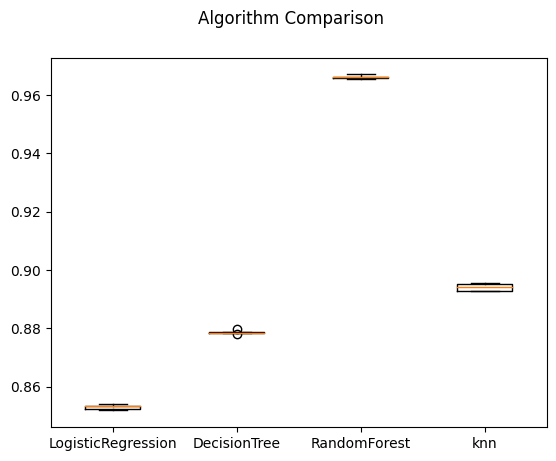

In [208]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('model_comparison.png')
plt.show()

In [209]:
# Random Forrest Classifier
rtree=RandomForestClassifier(random_state=5)
rtree.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=5)

In [210]:
y_pred=rtree.predict(X_test_balanced)
print('ROC-AUC score for Random Forest: ',roc_auc_score(y_test_balanced,y_pred))

ROC-AUC score for Random Forest:  0.8891550160504686


No Skill: ROC AUC=0.500
Test Score: ROC AUC=0.965
Train Score: ROC AUC=1.000


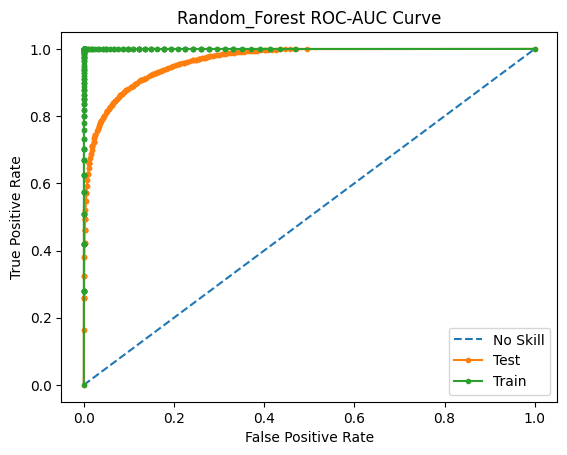

In [211]:
ns_probs = [0 for _ in range(len(y_test_balanced))]

## Tst
lr_probs_test = rtree.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs_test = lr_probs_test[:, 1]

## Train
lr_probs_train = rtree.predict_proba(X_train_balanced)
# keep probabilities for the positive outcome only
lr_probs_train = lr_probs_train[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc_test = roc_auc_score(y_test_balanced, lr_probs_test)
lr_auc_train = roc_auc_score(y_train_balanced, lr_probs_train)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Test Score: ROC AUC=%.3f' % (lr_auc_test))
print('Train Score: ROC AUC=%.3f' % (lr_auc_train))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test_balanced, lr_probs_test)
lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train_balanced, lr_probs_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Test')
plt.plot(lr_fpr_train, lr_tpr_train, marker='.', label='Train')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.title('Random_Forest ROC-AUC Curve')
plt.savefig('Random_Forest ROC-AUC Curve.png')
plt.show()

{'Accuracy': 0.8890913011473057, 'Precision': 0.8719324278050451, 'Sensitivity_recall': 0.9114120384179443, 'Specificity': 0.866897993682993, 'F1_score': 0.8912352340673764}


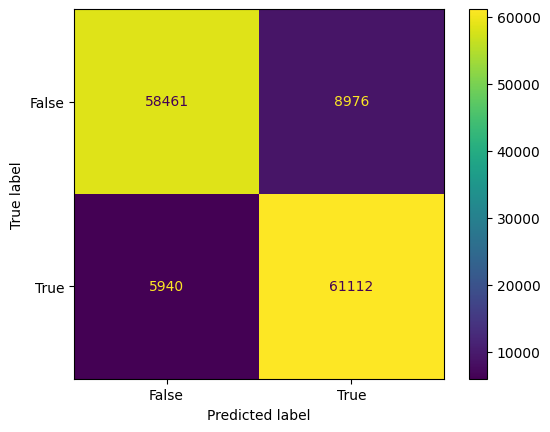

In [212]:
# Accuracy and Confusion Matrix
Accuracy = metrics.accuracy_score(y_test_balanced, y_pred)
Precision = metrics.precision_score(y_test_balanced, y_pred)
Sensitivity_recall = metrics.recall_score(y_test_balanced, y_pred)
Specificity = metrics.recall_score(y_test_balanced, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test_balanced, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test_balanced, y_pred)

print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,
       "F1_score":F1_score})
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.savefig('Random Forrest Confusion Matrix.png')
plt.show()

### XG Boost

In [213]:
# XGBoost Classifier.
xgb=XGBClassifier(random_state=5,max_depth=5)
xgb.fit(X_train_balanced,y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, ...)

No Skill: ROC AUC=0.500
Test Score: ROC AUC=0.970
Train Score: ROC AUC=0.970


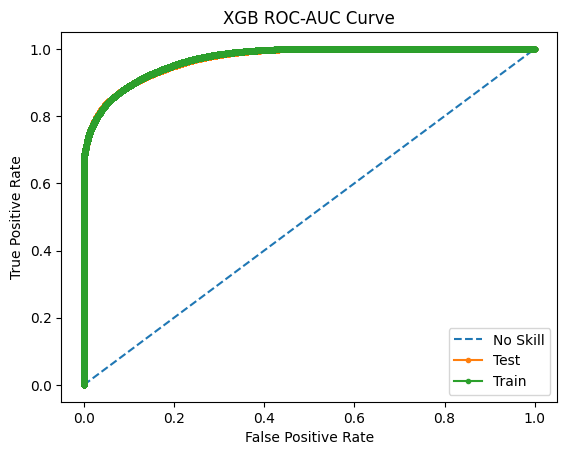

In [214]:
ns_probs = [0 for _ in range(len(y_test_balanced))]

## Tst
lr_probs_test = xgb.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs_test = lr_probs_test[:, 1]

## Train
lr_probs_train = xgb.predict_proba(X_train_balanced)
# keep probabilities for the positive outcome only
lr_probs_train = lr_probs_train[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc_test = roc_auc_score(y_test_balanced, lr_probs_test)
lr_auc_train = roc_auc_score(y_train_balanced, lr_probs_train)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Test Score: ROC AUC=%.3f' % (lr_auc_test))
print('Train Score: ROC AUC=%.3f' % (lr_auc_train))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test_balanced, lr_probs_test)
lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train_balanced, lr_probs_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Test')
plt.plot(lr_fpr_train, lr_tpr_train, marker='.', label='Train')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.title('XGB ROC-AUC Curve')
plt.savefig('xgb_ROC-AUC Curve.png')
plt.show()

In [215]:
y_pred=xgb.predict(X_test_balanced)
print('ROC-AUC score for XGB: ',roc_auc_score(y_test_balanced,y_pred))

ROC-AUC score for XGB:  0.8940885649538577


{'Accuracy': 0.89408055677416, 'Precision': 0.8913426907172183, 'Sensitivity_recall': 0.8968859989262066, 'Specificity': 0.8912911309815087, 'F1_score': 0.8941057530051071}


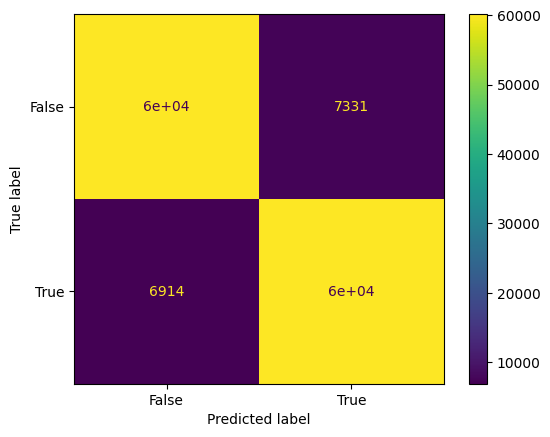

In [216]:
# Accuracy and Confusion Matrix.
Accuracy = metrics.accuracy_score(y_test_balanced, y_pred)
Precision = metrics.precision_score(y_test_balanced, y_pred)
Sensitivity_recall = metrics.recall_score(y_test_balanced, y_pred)
Specificity = metrics.recall_score(y_test_balanced, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test_balanced, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test_balanced, y_pred)

print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,"F1_score":F1_score})
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.savefig('XG Boost Confusion Matrix.png')
plt.show()

We get better accuracy from XGBoost.

So we are using XGBoost model for prediction.

In [217]:
# save the model to disk.
import pickle
filename = 'finalized_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [218]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [219]:
# Print the Score
print("Test score: {0:.2f} %".format(100 * result))  

# Predict the Labels using the reloaded Model
test.drop('id', axis=1, inplace=True)
Ypredict = loaded_model.predict(test)  
Ypredict

Test score: 83.24 %


array([0, 1, 1, ..., 0, 0, 0])

In [220]:
# Session Info
import session_info
session_info.show()

### THE END